# Gray graphy

In [2]:
# 
# Based environment:
# 
from __future__ import print_function
from  matplotlib import pyplot as plt
# %matplotlib inline
import cv2
import numpy as np
import pandas as pd

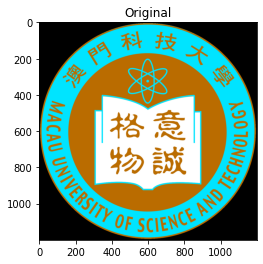

In [3]:
image = cv2.imread("../img_source/must_logo.png")
plt.imshow(image)
plt.title('Original')
plt.show()

## Simple Application
### Average Max and Min

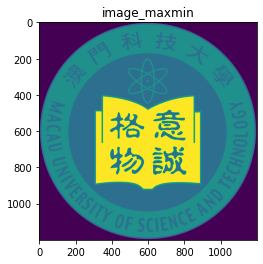

In [8]:
row, col, channel = image.shape
image_gray = np.zeros((row, col))

# I(x,y) = 0.5 * max(I_R(x,y), I_G(x,y), I_B(x,y))+ 0.5 * min(I_R(x,y), I_G(x,y), I_B(x,y))

for r in range(row):
    for l in range(col):
        image_gray[r, l] = 1 / 2 * max(image[r, l, 0], image[r, l, 1], image[r, l, 2]) + \
                         1 / 2 * min(image[r, l, 0],  image[r, l, 1], image[r, l, 2])
plt.imshow(image_gray)
plt.title('image_maxmin')
plt.show()

### Average Weight

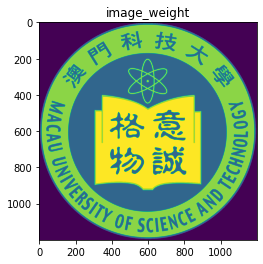

In [9]:
row, col, channel = image.shape
image_gray = np.zeros((row, col))



for r in range(row):
    for l in range(col):
        image_gray[r, l] = 0.11 * image[r, l, 0]+ 0.59* image[r, l, 1] + 0.3*image[r, l, 2]

plt.imshow(image_gray)
plt.title('image_weight')
plt.show()

### Binary value 

In [ ]:
row, col, channel = image.shape
image_gray = np.zeros((row, col))

for r in range(row):
    for l in range(col):
        image_gray[r, l] = 1 / 2 * max(image[r, l, 0], image[r, l, 1], image[r, l, 2]) + 1 / 2 * min(image[r, l, 0],  image[r, l, 1], image[r, l, 2])

image_binary = np.zeros_like(image_gray)

threshold = 100
for r in range(row):
    for l in range(col):
        if image_gray[r, l] >= threshold:
            image_binary[r, l] = 255
        else:
            image_binary[r, l] = 0

plt.imshow(image_gray)
plt.title('image_binary_value')
plt.show()

## Component

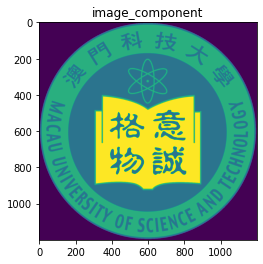

In [14]:
row, col, channel = image.shape
image_gray = np.zeros((row, col))

for r in range(row):
    for l in range(col):
        image_gray[r, l] = 1 / 3 * image[r, l, 0] + 1 / 3 * image[r, l, 1] + 1 / 3 * image[r, l, 2]

plt.imshow(image_gray)
plt.title('image_component')
plt.show()

### Inverse

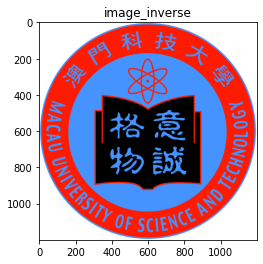

In [21]:
row, col, channel = image.shape

image_inverse = np.zeros_like(image)

for r in range(row):
    for l in range(col):
        image_inverse[r, l] = 255 - image[r, l]

plt.imshow(image_inverse)
plt.title('image_inverse')
plt.show()

## Sketch Application

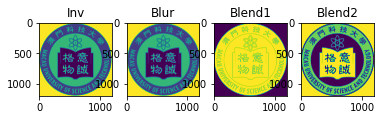

In [4]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_gray_inv = 255-image_gray
image_blur = cv2.GaussianBlur(image_gray_inv, (21, 21), 0)
image_blend1 = cv2.divide(image_gray, 255-image_blur, scale=256)
image_blend2 = 255-cv2.divide(255-image_gray, 255-image_blur, scale=256)

plt.subplot(1,4,1)
plt.imshow(image_gray_inv)
plt.title("Inv")
plt.subplot(1,4,2)
plt.imshow(image_blur)
plt.title("Blur")
plt.subplot(1,4,3)
plt.imshow(image_blend1)
plt.title("Blend1")
plt.subplot(1,4,4)
plt.imshow(image_blend2)
plt.title("Blend2")
plt.show()